# Spotify-DataAnalysis
 Today we Analysis and clustering of popular songs and their attributes u

Python's spotipy library is used to get data from Spotify. By doing searches with characters(A-Z, 0-9) 1750 songs were collected. These songs are shared in the .csv file.

Numerical features provided by spotify are collected and analyzed. K-Means Clustering Algorithm is used to group songs that are similar to each other.


In [119]:
# import libraries
import pandas as pd  # used for data preprocessesing 
import numpy as np  # used for methamatical calculation 
import seaborn as sns  # used for vizualization 
import matplotlib.pyplot as plt  # used for vizualization 
from sklearn.preprocessing import StandardScaler # covert zero mean one standard deviation 
from sklearn.cluster import KMeans

In [98]:
# Import data 
data=pd.read_csv("/content/spotify_data.csv")
# drop  useless columns
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

#first five rows of data 
data.head() 

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.1810,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,89,0.336,0.1640,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4


In [99]:
# Cheaking missing value 
data.isnull().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [100]:
#cheaking dtype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1750 non-null   object 
 1   album             1750 non-null   object 
 2   artist            1750 non-null   object 
 3   release_date      1750 non-null   object 
 4   length            1750 non-null   int64  
 5   popularity        1750 non-null   int64  
 6   danceability      1750 non-null   float64
 7   acousticness      1750 non-null   float64
 8   energy            1750 non-null   float64
 9   instrumentalness  1750 non-null   float64
 10  liveness          1750 non-null   float64
 11  loudness          1750 non-null   float64
 12  speechiness       1750 non-null   float64
 13  tempo             1750 non-null   float64
 14  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


In [101]:
#statisical  look 
data.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,195436.638286,69.506286,0.651688,0.298371,0.592553,0.053457,0.177332,-7.867144,0.118890,122.115411,3.932000
std,47465.014667,24.158489,0.175828,0.301546,0.205806,0.195213,0.129798,5.190363,0.112192,31.493535,0.396459
min,34533.000000,0.000000,0.000000,0.000035,0.000020,0.000000,0.032700,-40.449000,0.000000,0.000000,0.000000
25%,167280.500000,68.000000,0.553250,0.051825,0.479000,0.000000,0.101000,-8.440250,0.040200,94.736000,4.000000
50%,193838.000000,77.000000,0.671000,0.183000,0.623000,0.000000,0.125000,-6.522000,0.064850,123.049500,4.000000
75%,222346.000000,83.000000,0.779000,0.499000,0.739750,0.000095,0.213750,-5.131750,0.160000,143.929000,4.000000
max,530253.000000,100.000000,0.980000,0.996000,0.997000,1.000000,0.945000,-1.465000,0.777000,211.968000,5.000000


In [102]:
## shape of data
data.shape

(1750, 15)

In [103]:
data.drop_duplicates(keep='first',inplace=True)

data.sort_values("popularity",ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
150,drivers license,drivers license,Olivia Rodrigo,2021-01-08,242013,100,0.585,0.72100,0.436,0.000013,0.1050,-8.761,0.0601,143.874,4
154,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,140525,96,0.700,0.22100,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4
51,Blinding Lights,After Hours,The Weeknd,2020-03-20,200040,96,0.514,0.00146,0.730,0.000095,0.0897,-5.934,0.0598,171.005,4
76,DÁKITI,DÁKITI,Bad Bunny,2020-10-30,205090,95,0.731,0.40100,0.573,0.000052,0.1130,-10.059,0.0544,109.928,4
9,positions,Positions,Ariana Grande,2020-10-30,172324,95,0.737,0.46800,0.802,0.000000,0.0931,-4.771,0.0878,144.015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,It Girl - 7th Heaven Club Mix,Feel Good Friday,Various Artists,2021-01-22,384600,0,0.719,0.00485,0.875,0.305000,0.0442,-5.874,0.0475,125.988,4
563,Love Yourself,2000s Love Songs,Various Artists,2021-01-25,232626,0,0.759,0.86000,0.401,0.000000,0.2990,-8.999,0.2590,100.126,4
1698,"English Suite No. 2 in A Minor, BWV 807: I. Pr...",Classical Music in Woody Allen Films,Various Artists,2021-01-15,331726,0,0.324,0.84200,0.462,0.001670,0.0681,-19.723,0.0342,95.884,3
220,En Lo Oscuro,Regeton Viejo Vol.2,Various Artists,2021-01-22,194040,0,0.768,0.31300,0.703,0.000000,0.1200,-11.106,0.1280,93.990,4


# Analysis

here We cheak the relationship between  all columns  useing  heatmap

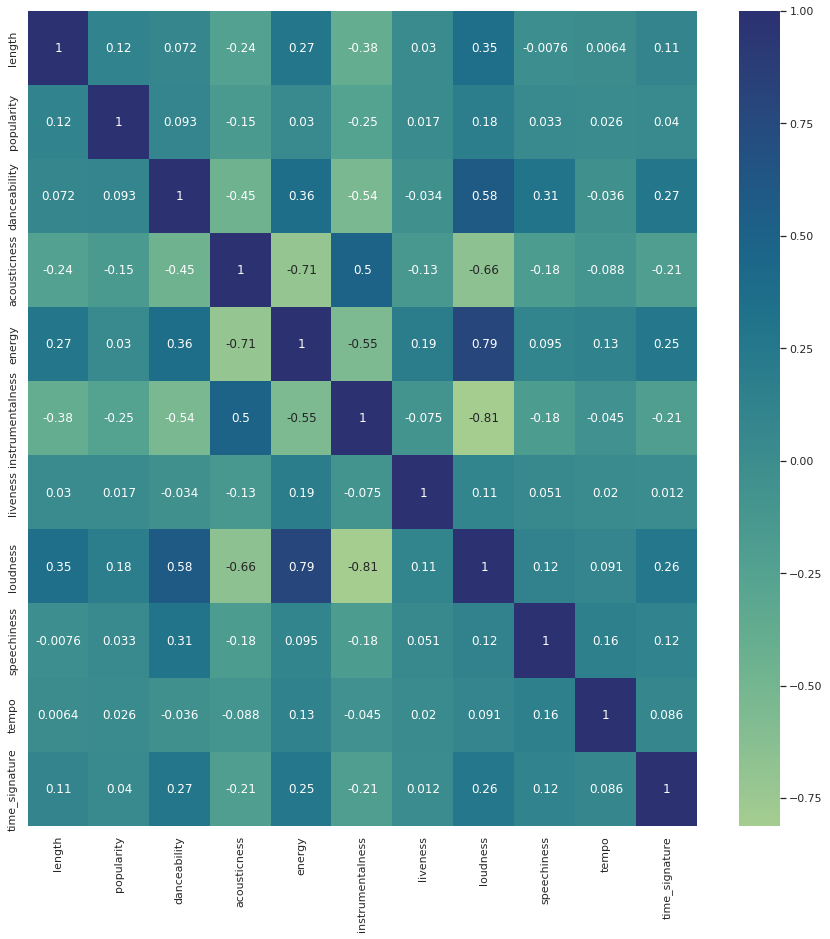

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='crest')
plt.show()

<Figure size 1440x864 with 0 Axes>

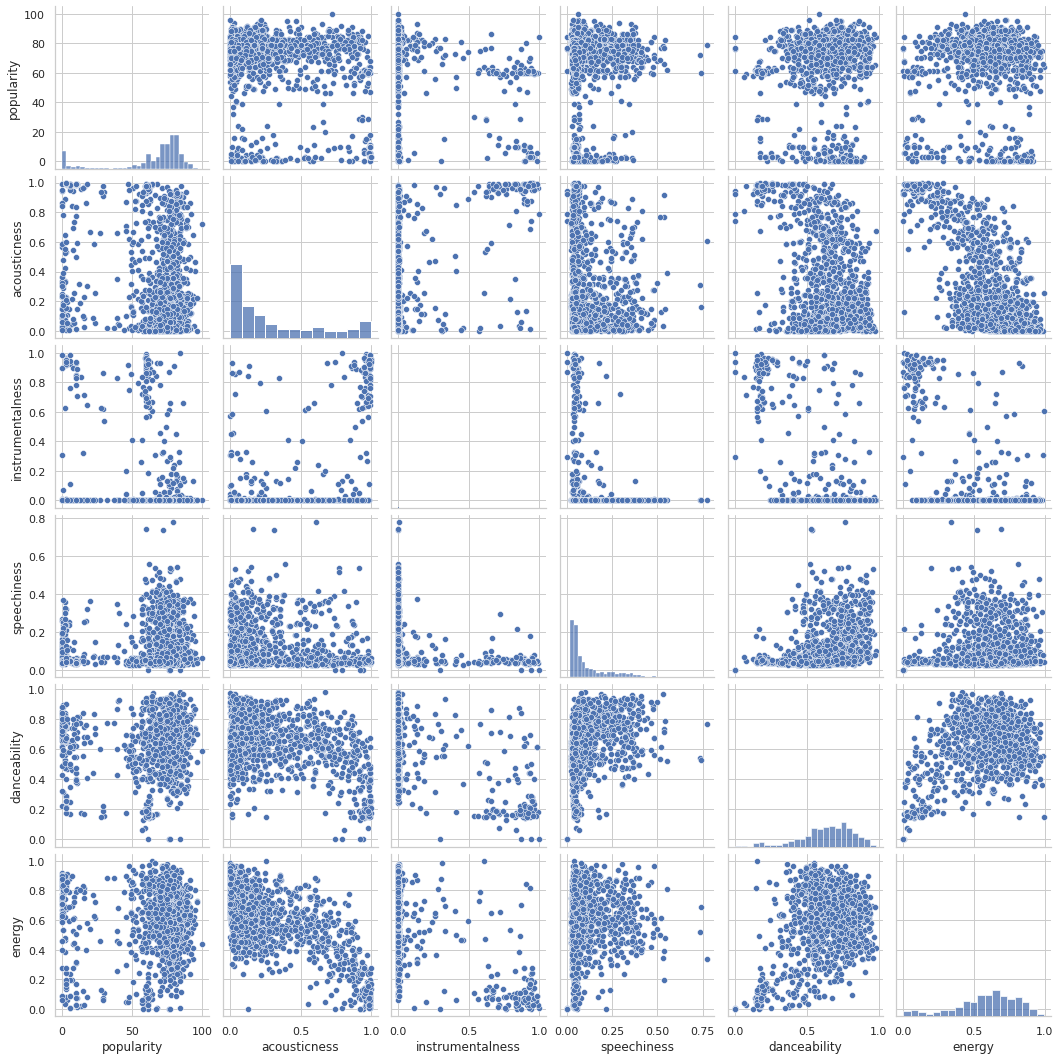

In [105]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
cols=["popularity","acousticness","instrumentalness","speechiness","danceability","energy"]
sns.pairplot(data[cols],height=2.5)
plt.show()

## Here we have artist who have high popularity in this data 

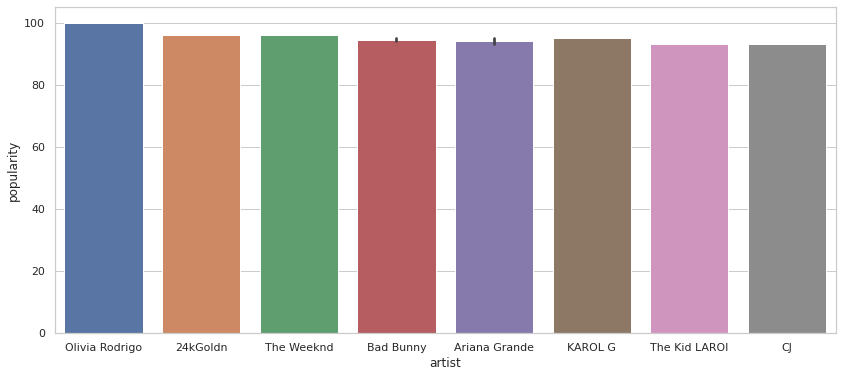

In [106]:
popular_songs=data.sort_values('popularity',ascending=False)
artist_with_popularity=popular_songs[['artist','popularity']]
artist_with_popularity

plt.figure(figsize=(14,6))
sns.barplot(x=artist_with_popularity.artist.head(10),y=artist_with_popularity.popularity.head(10))

now we cheak the song which have high popularities 

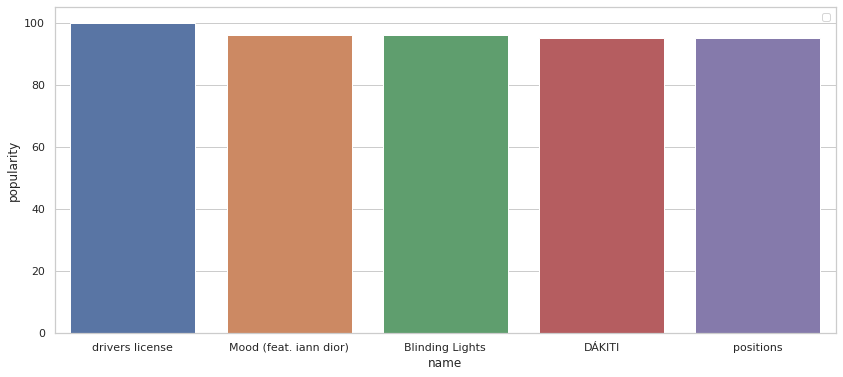

In [107]:
popular_songs=data.sort_values('popularity',ascending=False)
songs_with_popularity=popular_songs[['name','popularity']]
songs_with_popularity


plt.figure(figsize=(14,6))
sns.barplot(x=songs_with_popularity.head(5).name,y=songs_with_popularity.popularity)
plt.legend()

Now we cheak that which album have highest songs 

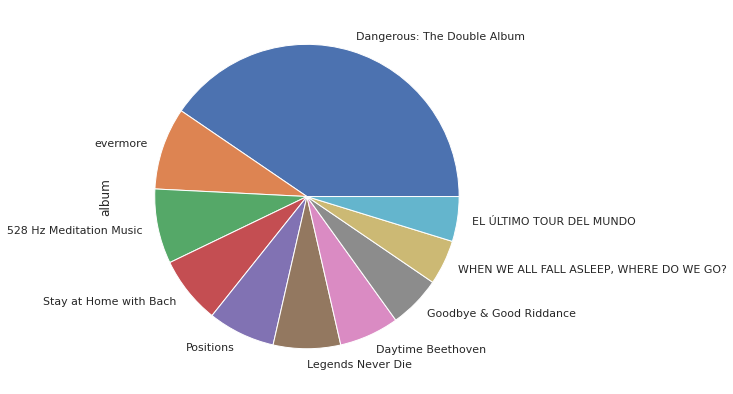

In [108]:
data['album'].value_counts().head(10).plot(figsize=(15,7),kind='pie',)

## Preprocessing And Clustering

Droping the feature who wont use in clustering  popularity is not nessessery  because we only inspect popular songs 

In [113]:
data2= data.select_dtypes(include = ['int64','float64']).drop(columns=['popularity'])

In [115]:
data2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,190779,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,174321,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,165819,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,173710,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,241106,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
...,...,...,...,...,...,...,...,...,...,...
1745,210893,0.629,0.00606,0.791,0.000000,0.1260,-4.308,0.1010,128.982,4
1746,217706,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1747,174806,0.642,0.93500,0.317,0.000000,0.2070,-9.325,0.1550,150.152,4
1748,180053,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4


In [116]:
scaler=StandardScaler()
data2=pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
data2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,-0.129913,0.261695,-0.417205,-0.213204,-0.326312,-0.476170,0.047653,-0.718725,-0.199825,0.182197
1,-0.449762,1.365523,-0.299671,-1.105146,0.241525,-0.908571,0.089971,-0.408849,-0.891360,0.182197
2,-0.614993,0.180132,-0.747889,-0.253747,-0.324863,-0.680442,0.181466,1.680175,1.257694,0.182197
3,-0.461637,1.044706,-0.239316,-0.001481,-0.326326,0.530280,0.306917,-0.194929,-0.386531,0.182197
4,0.848157,-1.641456,-0.471207,0.187719,-0.326326,-0.790779,0.141824,-0.684392,0.887315,0.182197
...,...,...,...,...,...,...,...,...,...,...
1211,0.260988,-0.048246,-0.972919,0.926499,-0.326326,-0.379253,0.669552,-0.133306,0.214242,0.182197
1212,0.393394,0.490074,0.980498,-0.100585,-0.326326,0.015872,0.043136,0.157203,-0.701429,0.182197
1213,-0.440337,0.022442,1.977950,-1.208755,-0.326326,0.224618,-0.169627,0.342073,0.883490,0.182197
1214,-0.338365,1.050144,-0.737089,-0.600613,-0.326326,1.357806,0.535236,-0.608684,-0.921993,0.182197


In [121]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=1000,random_state=42)
  model.fit(data2)
  wcss.append(model.inertia_)


In [122]:
wcss

[12159.999999999995,
 8693.924483002902,
 7658.204334621338,
 6828.664792495647,
 6209.792441370977,
 5653.919319261288,
 5230.459676059325,
 4972.8681096505425,
 4827.481043219625,
 4612.8191997385475]

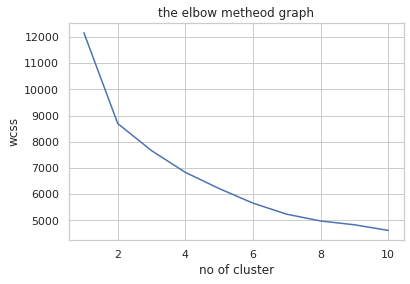

In [124]:
plt.plot(range(1,11),wcss)
plt.title("the elbow metheod graph")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

we decided to chose 4 as our k train our model for last time and predict the cluster 

In [126]:
kmean=KMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=10,random_state=0)
y_kmean=kmean.fit_predict(data2)

In [129]:
data['cluster']=y_kmean
data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.1810,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,2
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,0
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,3
3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,89,0.336,0.1640,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,2


In [130]:
cluster_0=data[data['cluster']==0]
cluster_1=data[data['cluster']==1]
cluster_2=data[data['cluster']==2]
cluster_3=data[data['cluster']==3]

In [131]:
data.cluster.value_counts()

2    623
0    275
3    226
1     92
Name: cluster, dtype: int64

In [133]:
cluster_0.head(2)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.218,0.340,0.13,0.055,-7.773,0.0697,94.009,4,0
8,Afterglow,Afterglow,Ed Sheeran,2020-12-21,185486,90,0.641,0.698,0.324,0.00,0.328,-5.851,0.0299,110.184,4,0


In [134]:
cluster_1.head(2)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
129,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Erik Eriksson,2017-01-08,90228,84,0.000,0.7910,0.00342,1.000,0.111,-28.460,0.000,0.000,0,1
1075,Zen Thunder,Zen Thunder,Zen Master,2020-08-09,179000,62,0.149,0.0122,0.82000,0.933,0.872,-25.268,0.177,83.354,4,1


In [135]:
cluster_2.head(2)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.181,0.538,0.000003,0.113,-8.026,0.0345,115.884,4,2
3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.237,0.585,0.000000,0.248,-6.476,0.0940,109.978,4,2


In [137]:
cluster_3.head(2)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,3
7,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,91,0.823,0.1140,0.586,0.000000,0.1930,-6.606,0.200,125.971,4,3
